In [1]:
import sys
sys.path.insert(0, '/home/giulia/Provenance')
#import ipynb.fs.full.provenance as pr
import ipynb.fs.full.provenance_lib as pr_lib
import pandas as pd
import numpy as np

from IPython.display import Image

# Specify where to save the processed files as savepath
savepath = 'results/OneHot_prov/'

In [2]:
# Files get loaded from fairCorrect github repository
url = 'https://raw.githubusercontent.com/vladoxNCL/fairCorrect/master/Datasets/'
df = pd.read_csv(url + 'german.csv', header=None)

# Data needed column names
df.columns = ['checking', 'duration', 'credit_history', 'purpose', 'credit_amount',
              'savings', 'employment', 'inst_rate', 'personal_status', 'other_debtors',
              'residence_time', 'property', 'age', 'other_inst', 'housing', 'num_credits',
              'job', 'dependants', 'phone', 'foreigner', 'label']

# Turn criptic values into interpretable form
df = df.replace({'checking': {'A11': 'check_low', 'A12': 'check_mid', 'A13': 'check_high',
                              'A14': 'check_none'},
                 'credit_history': {'A30': 'debt_none', 'A31': 'debt_noneBank',
                                    'A32': 'debt_onSchedule','A33': 'debt_delay',
                                    'A34': 'debt_critical'},
                 'purpose': {'A40': 'pur_newCar', 'A41': 'pur_usedCar',
                             'A42': 'pur_furniture', 'A43': 'pur_tv',
                             'A44': 'pur_appliance', 'A45': 'pur_repairs',
                             'A46': 'pur_education', 'A47': 'pur_vacation',
                             'A48': 'pur_retraining', 'A49': 'pur_business',
                             'A410': 'pur_other'},
                 'savings': {'A61': 'sav_small', 'A62': 'sav_medium', 'A63': 'sav_large',
                             'A64': 'sav_xlarge', 'A65': 'sav_none'},
                 'employment': {'A71': 'emp_unemployed', 'A72': 'emp_lessOne',
                                'A73': 'emp_lessFour', 'A74': 'emp_lessSeven',
                                'A75': 'emp_moreSeven'},
                 'other_debtors': {'A101': 'debtor_none', 'A102': 'debtor_coApp',
                                   'A103': 'debtor_guarantor'},
                 'property': {'A121': 'prop_realEstate', 'A122': 'prop_agreement',
                              'A123': 'prop_car', 'A124': 'prop_none'},
                 'other_inst': {'A141': 'oi_bank', 'A142': 'oi_stores', 'A143': 'oi_none'},
                 'housing': {'A151': 'hous_rent', 'A152': 'hous_own', 'A153': 'hous_free'},
                 'job': {'A171': 'job_unskilledNR', 'A172': 'job_unskilledR',
                         'A173': 'job_skilled', 'A174': 'job_highSkill'},
                 'phone': {'A191': 0, 'A192': 1},
                 'foreigner': {'A201': 1, 'A202': 0},
                 'label': {2: 0}})

# More criptic values translating
df['status'] = np.where(df.personal_status == 'A91', 'divorced',
                        np.where(df.personal_status == 'A92', 'divorced', 
                                 np.where(df.personal_status == 'A93', 'single',
                                          np.where(df.personal_status == 'A95', 'single',
                                                   'married'))))
# Translate gender values
df['gender'] = np.where(df.personal_status == 'A92', 0,
                        np.where(df.personal_status == 'A95', 0,
                                 1))

# Drop personal_status column
df = df.drop(['personal_status'], axis=1)


df = df[:4]
df = df[['checking', 'duration', 'credit_history']]
# Create a new provenance document and input entities 
#p = pr.Provenance(df, savepath)
p = pr_lib.Provenance(df, savepath)

m, n= df.shape
print("IN - Rows: ", m, " Features: ",n)
print(df)

columns_in = df.columns

IN - Rows:  4  Features:  3
     checking  duration   credit_history
0   check_low         6    debt_critical
1   check_mid        48  debt_onSchedule
2  check_none        12    debt_critical
3   check_low        42  debt_onSchedule


In [3]:
# One-hot encode categorical columns
onehot_col = ['checking', 'credit_history', 'purpose', 'savings', 'employment', 'other_debtors', 'property',
       'other_inst', 'housing', 'job', 'status']
onehot_col = ['checking', 'credit_history']

onehot_col_map = {}

for c in onehot_col:
    #Get map column-val
    unique_val = df[c].unique().tolist()
    onehot_col_map[c] = unique_val
    
    dummies = []
    dummies.append(pd.get_dummies(df[c]))
    df_dummies = pd.concat(dummies, axis = 1)
    df = pd.concat((df, df_dummies), axis = 1)
    df = df.drop([c], axis = 1)
    
print(df)




   duration  check_low  check_mid  check_none  debt_critical  debt_onSchedule
0         6          1          0           0              1                0
1        48          0          1           0              0                1
2        12          0          0           1              1                0
3        42          1          0           0              0                1


In [4]:
#GET PROVENANCE
d = p.get_prov_onehot_encode(df, onehot_col, onehot_col_map)

get_prov_onehot_encode function took 40.370 ms


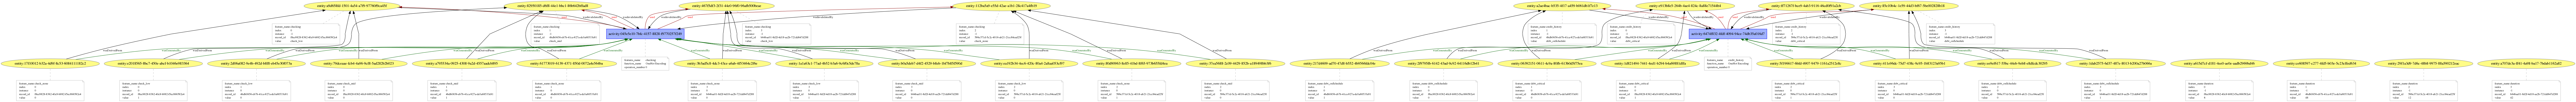

In [5]:
namefile = 'onehot_prov'
p.save_all_graph(namefile)
Image(savepath + namefile + '.png')
        